## Task 2

forecasting_dataset.csv is a file that contains pollution data for a city. Your task is to create a model that, when fed with columns co_gt, nhmc, c6h6, s2, nox, s3, no2, s4, s5, t, rh, ah, and level, predicts the value of y six hours later.

In [5]:
# basic bitches
import numpy as np
import pandas as pd
import datetime as dt
import missingno as msn

# viz
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
df = pd.read_csv("../../data/forecasting_dataset.csv")
df.shape

(8421, 16)

In [3]:
df.head()

,date,time,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,10/13/2004,20:00:00,943,-200.0,-200.0,7.2,867.0,-200.0,834.0,-200.0,1314.0,891.0,14.8,57.3,0.9603,NaN
1,8/10/2004,3:00:00,919,0.5,-200.0,3.9,704.0,-200.0,861.0,-200.0,1603.0,860.0,24.4,65.0,1.9612,Low
2,6/21/2004,8:00:00,1221,3.7,-200.0,23.3,1386.0,NaN,626.0,109.0,2138.0,NaN,23.3,38.6,1.0919,High
3,7/12/2004,12:00:00,1024,2.1,-200.0,12.1,1052.0,183.0,779.0,NaN,1690.0,952.0,28.5,27.3,1.0479,High
4,12/14/2004,12:00:00,1377,4.4,-200.0,21.7,1342.0,786.0,499.0,206.0,1546.0,2006.0,12.9,54.1,0.8003,High


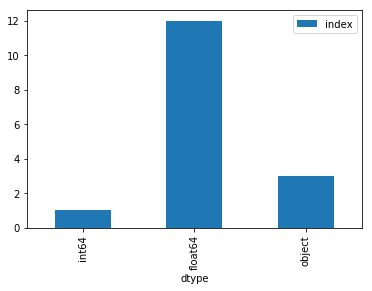

In [6]:
pd.DataFrame(df.dtypes.values, columns=['dtype']).reset_index().groupby('dtype').count().plot(kind='bar')

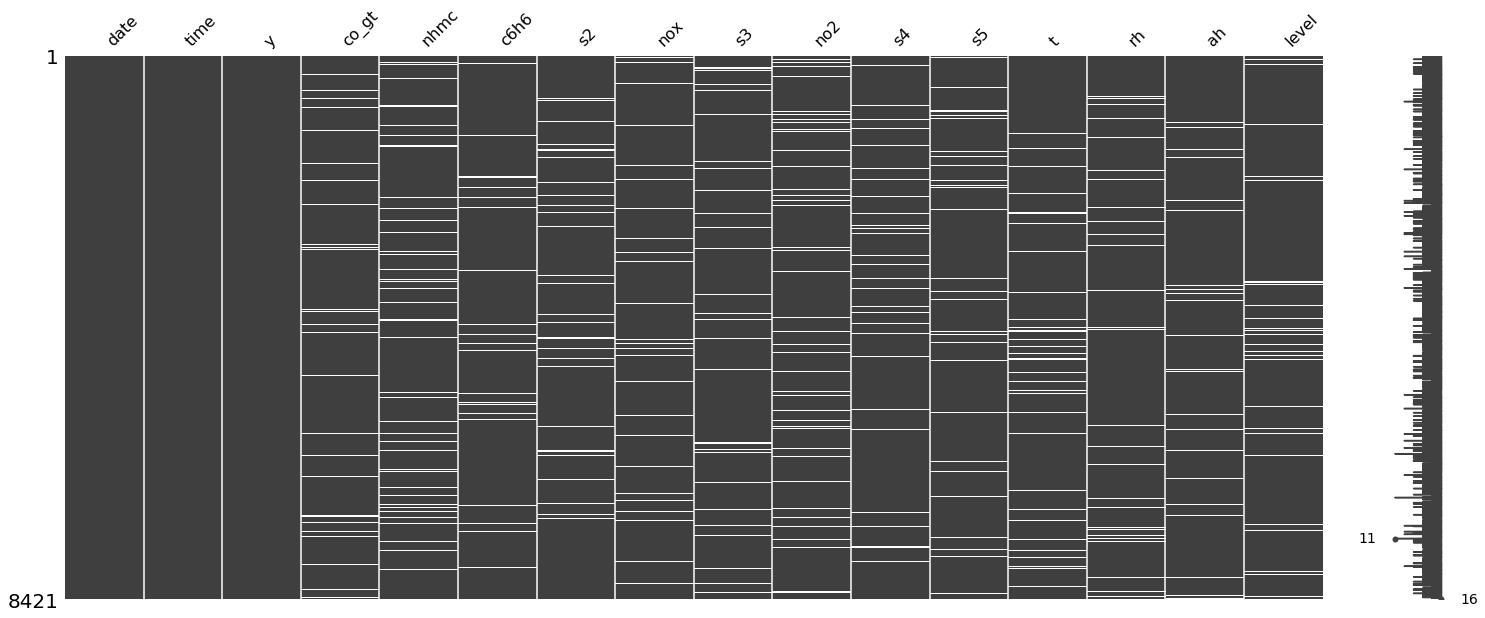

In [7]:
msn.matrix(df)

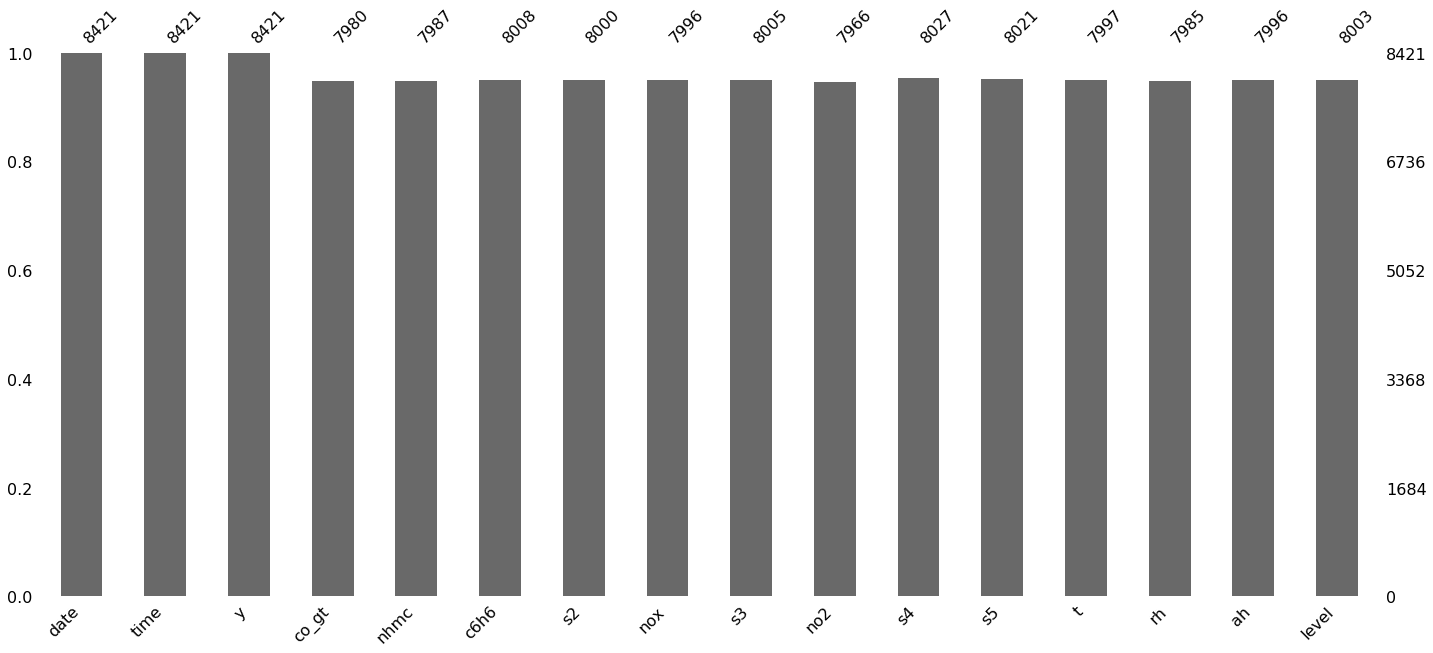

In [9]:
msn.bar(df)

In [23]:
# Time 
pollution = df.sort_values("y")

# Refactor the time_stamp column to datetime object
pollution["date"] = pd.to_datetime(df["date"])
pollution["time"] = pd.to_datetime(df["time"], format= '%H:%M:%S' ).dt.time

pollution = pollution.sort_values(["date","time"])

# Reset index
pollution = pollution.reset_index().iloc[:,1:29]
pollution.head()

,date,time,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,2004-03-10,18:00:00,1360,2.6,150.0,11.9,NaN,166.0,1056.0,113.0,1692.0,NaN,13.6,48.9,0.7578,High
1,2004-03-10,19:00:00,1292,2.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,High
2,2004-03-10,20:00:00,1402,2.2,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,NaN,0.7502,NaN
3,2004-03-10,21:00:00,1376,2.2,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,High
4,2004-03-10,22:00:00,1272,1.6,51.0,6.5,836.0,131.0,1205.0,116.0,NaN,1110.0,NaN,59.6,0.7888,High


In [25]:
# Create column contains value of 6 hours later:
pollution["status_shift"] = pollution[['time','y']]['y'].transform(lambda g: g.shift(periods=-6))

In [28]:
pollution[['date','time','y',"status_shift"]].head()

,date,time,y,status_shift
0,2004-03-10,18:00:00,1360,1185.0
1,2004-03-10,19:00:00,1292,1136.0
2,2004-03-10,20:00:00,1402,1094.0
3,2004-03-10,21:00:00,1376,1010.0
4,2004-03-10,22:00:00,1272,1011.0


In [30]:
# Create a list of features needed
X_col = [ i for i in pollution.columns if i not in ['date', 'status_shift', 'y']]

In [31]:
# Create X, y
X = pollution[X_col]
y = pollution[["y","date"]] # keeping time_stamp to split train test validation

In [32]:
# Split Train, Test, Validation set

# For X
Xval = X[X['date'].dt.year==2018].loc[:, X.columns != "date"]
Xtest = X[(X['date'].dt.year < 2018) & (X['date'].dt.year > 2015)].loc[:,X.columns != "date"]
Xtrain = X[X['date'].dt.year<2016].loc[:,X.columns != "date"]

# For y:
yval = y[y['date'].dt.year==2018]['y']
ytest = y[(y['date'].dt.year < 2018) & (y['date'].dt.year > 2015)]['y']
ytrain = y[y['date'].dt.year<2016]['y']

KeyError: 'date'